# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# DATA READING

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# DATA PREPROCESSING

In [3]:
len(data)

1000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
data.rename(columns={'race/ethnicity':'race'},inplace=True)

In [8]:
data.columns

Index(['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# DATA WRANGLING

In [9]:
data.columns = data.columns.str.capitalize()

In [10]:
data.columns

Index(['Gender', 'Race', 'Parental level of education', 'Lunch',
       'Test preparation course', 'Math score', 'Reading score',
       'Writing score'],
      dtype='object')

In [11]:
data.head(2)

,Gender,Race,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [12]:
data.Gender.unique()

array(['female', 'male'], dtype=object)

In [13]:
data.Race.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [14]:
data['Parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [15]:
data[data['Parental level of education'] == 'some college']

,Gender,Race,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
1,female,group C,some college,standard,completed,69,90,88
4,male,group C,some college,standard,none,76,78,75
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
13,male,group A,some college,standard,completed,78,72,70
...,...,...,...,...,...,...,...,...
976,male,group B,some college,free/reduced,completed,60,62,60
983,female,group A,some college,standard,completed,78,87,91
989,female,group D,some college,free/reduced,completed,67,86,83
998,female,group D,some college,standard,completed,68,78,77


In [16]:
data.loc[data['Parental level of education'] == 'some college', 'Parental level of education'] =\
'college'

In [17]:
data['Parental level of education'].unique()

array(["bachelor's degree", 'college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [18]:
data.loc[data['Parental level of education'] == 'some high school', 'Parental level of education'] =\
'school'

In [19]:
data.loc[data['Parental level of education'] == "associate's degree", 'Parental level of education'] =\
"bachelor's degree"

In [20]:
data.Lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [21]:
data.loc[data.Lunch == 'free/reduced', 'Lunch'] = 'free'

In [22]:
data.loc[data.Lunch == 'standard', 'Lunch'] = 'paid'

In [23]:
data.Lunch.unique()

array(['paid', 'free'], dtype=object)

In [24]:
data.columns

Index(['Gender', 'Race', 'Parental level of education', 'Lunch',
       'Test preparation course', 'Math score', 'Reading score',
       'Writing score'],
      dtype='object')

In [25]:
data['Test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [26]:
data.loc[data['Test preparation course'] == 'none', 'Test preparation course'] = 'not completed'

In [27]:
data['Test preparation course'].unique()

array(['not completed', 'completed'], dtype=object)

In [28]:
data.head()

,Gender,Race,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,paid,not completed,72,72,74
1,female,group C,college,paid,completed,69,90,88
2,female,group B,master's degree,paid,not completed,90,95,93
3,male,group A,bachelor's degree,free,not completed,47,57,44
4,male,group C,college,paid,not completed,76,78,75


In [29]:
data['Percentage'] = round(((data['Math score'] + data['Reading score'] +\
                             data['Writing score'])/300)*100,2).astype('str') + '%'

In [30]:
data.head()

,Gender,Race,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Percentage
0,female,group B,bachelor's degree,paid,not completed,72,72,74,72.67%
1,female,group C,college,paid,completed,69,90,88,82.33%
2,female,group B,master's degree,paid,not completed,90,95,93,92.67%
3,male,group A,bachelor's degree,free,not completed,47,57,44,49.33%
4,male,group C,college,paid,not completed,76,78,75,76.33%


In [31]:
data[data['Test preparation course'] == 'completed']

,Gender,Race,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Percentage
1,female,group C,college,paid,completed,69,90,88,82.33%
6,female,group B,college,paid,completed,88,95,92,91.67%
8,male,group D,high school,free,completed,64,64,67,65.0%
13,male,group A,college,paid,completed,78,72,70,73.33%
18,male,group C,master's degree,free,completed,46,42,46,44.67%
...,...,...,...,...,...,...,...,...,...
990,male,group E,high school,free,completed,86,81,75,80.67%
991,female,group B,school,paid,completed,65,82,78,75.0%
995,female,group E,master's degree,paid,completed,88,99,95,94.0%
997,female,group C,high school,free,completed,59,71,65,65.0%


In [32]:
data['Percentage'][0] >= '60.00%'

True

In [33]:
temp_res = []
for i in range(len(data)):
    if data['Percentage'][i] >= '60.00%' :
        temp_res.append('Pass')
    else:
        temp_res.append('Fail')
data['Result'] = temp_res
data.head()

,Gender,Race,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Percentage,Result
0,female,group B,bachelor's degree,paid,not completed,72,72,74,72.67%,Pass
1,female,group C,college,paid,completed,69,90,88,82.33%,Pass
2,female,group B,master's degree,paid,not completed,90,95,93,92.67%,Pass
3,male,group A,bachelor's degree,free,not completed,47,57,44,49.33%,Fail
4,male,group C,college,paid,not completed,76,78,75,76.33%,Pass


In [34]:
data['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

# VISUALISATIONS OF INSIGHTS

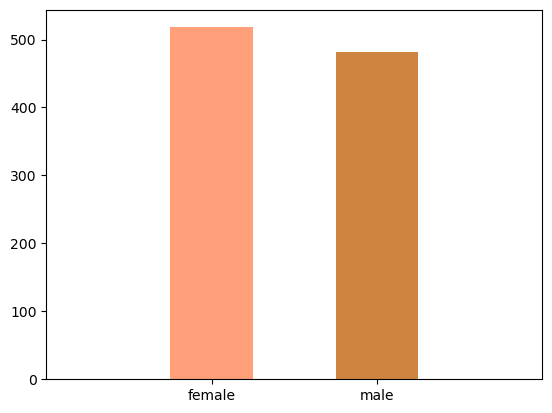

In [35]:
pyp.xlim(-1,2)
pyp.bar(data['Gender'].value_counts().index,data['Gender'].value_counts().values,\
       color=['lightsalmon','peru'],width=0.5)
pyp.show()

In [36]:
data['Result'].value_counts()

Pass    705
Fail    295
Name: Result, dtype: int64

In [37]:
len(data[(data['Result'] == 'Pass') & (data['Gender'] == 'female')])

389

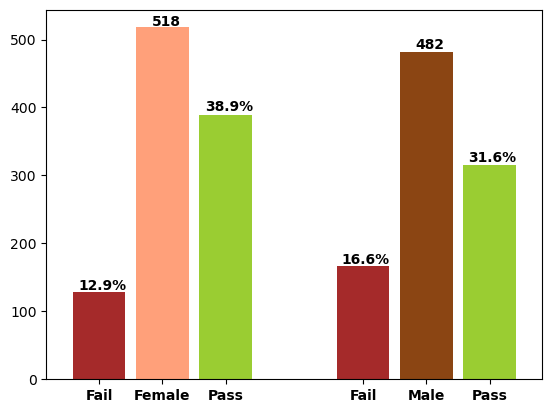

In [38]:
pyp.xlim(-0.8, 3.9)

pyp.bar(-0.3,len(data[(data['Result'] == 'Fail') & (data['Gender'] == 'female')]),
       color=['brown'],width=0.5)
pyp.bar(0.3,data['Gender'].value_counts().values[0],\
       color=['lightsalmon'],width=0.5)
pyp.bar(0.9,len(data[(data['Result'] == 'Pass') & (data['Gender'] == 'female')]),
       color=['yellowgreen'],width=0.5)


pyp.bar(2.2,len(data[(data['Result'] == 'Fail') & (data['Gender'] == 'male')]),
       color=['brown'],width=0.5)
pyp.bar(2.8,data['Gender'].value_counts().values[1],\
       color=['saddlebrown'],width=0.5)
pyp.bar(3.4,len(data[(data['Result'] == 'Pass') & (data['Gender'] == 'male')]),
       color=['yellowgreen'],width=0.5)

ax = pyp.gca()
ax.text(-0.5,132,str(len(data[(data['Result'] == 'Fail') & (data['Gender'] == 'female')])/\
                    1000*100)+'%',weight='bold')
ax.text(0.7,395,str(len(data[(data['Result'] == 'Pass') & (data['Gender'] == 'female')])/\
                    1000*100)+'%',weight='bold')
ax.text(2.0,170,str(len(data[(data['Result'] == 'Fail') & (data['Gender'] == 'male')])/\
                    1000*100)+'%',weight='bold')
ax.text(3.2,320,str(len(data[(data['Result'] == 'Pass') & (data['Gender'] == 'male')])/\
                    1000*100)+'%',weight='bold')
ax.text(0.2,520,str(len(data[data['Gender'] == 'female'])),weight='bold')
ax.text(2.7,487,str(len(data[data['Gender'] == 'male'])),weight='bold')

pyp.xticks([-0.3, 0.3, 0.9, 2.2, 2.8, 3.4], ['Fail', 'Female', 'Pass', 'Fail', 'Male', 'Pass'],\
          weight='bold')
pyp.show()

In [39]:
data.head()

,Gender,Race,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Percentage,Result
0,female,group B,bachelor's degree,paid,not completed,72,72,74,72.67%,Pass
1,female,group C,college,paid,completed,69,90,88,82.33%,Pass
2,female,group B,master's degree,paid,not completed,90,95,93,92.67%,Pass
3,male,group A,bachelor's degree,free,not completed,47,57,44,49.33%,Fail
4,male,group C,college,paid,not completed,76,78,75,76.33%,Pass


In [40]:
data.Race.unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [41]:
data.Race.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race, dtype: int64

In [42]:
len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group A')])

49

In [43]:
len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group B')])

127

In [44]:
len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group C')])

219

In [45]:
len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group D')])

197

In [46]:
len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group E')])

113

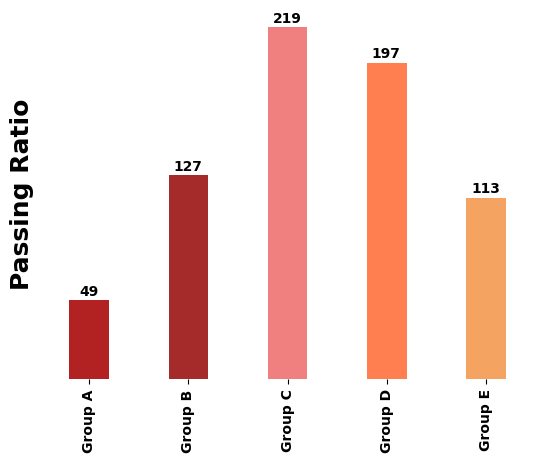

In [47]:
pyp.xlim(-5,5)

ax = pyp.gca()
ax.tick_params(left = False)

for location in ["left","right","bottom","top"]:
    ax.spines[location].set_visible(False)


pyp.bar(-4,len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group A')]),\
       color='firebrick')
pyp.bar(-2,len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group B')]),\
       color='brown')
pyp.bar(0,len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group C')]),\
       color='lightcoral')
pyp.bar(2,len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group D')]),\
       color='coral')
pyp.bar(4,len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group E')]),\
       color='sandybrown')

pyp.xticks([-4,-2,0,2,4],['Group A','Group B','Group C','Group D','Group E'],rotation=90,\
           weight='bold')
pyp.yticks([])
pyp.ylabel('Passing Ratio',fontsize=18,weight='bold')

ax.text(-4.2,len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group A')])+3,\
       len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group A')]),weight='bold')
ax.text(-2.3,len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group B')])+3,\
       len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group B')]),weight='bold')
ax.text(-0.3,len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group C')])+3,\
       len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group C')]),weight='bold')
ax.text(1.7,len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group D')])+3,\
       len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group D')]),weight='bold')
ax.text(3.7,len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group E')])+3,\
       len(data[(data['Result'] == 'Pass') & (data['Race'] == 'group E')]),weight='bold')

pyp.show()

# FEATURE SCALING

In [48]:
data.head()

,Gender,Race,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Percentage,Result
0,female,group B,bachelor's degree,paid,not completed,72,72,74,72.67%,Pass
1,female,group C,college,paid,completed,69,90,88,82.33%,Pass
2,female,group B,master's degree,paid,not completed,90,95,93,92.67%,Pass
3,male,group A,bachelor's degree,free,not completed,47,57,44,49.33%,Fail
4,male,group C,college,paid,not completed,76,78,75,76.33%,Pass


In [49]:
data['Percentage'] = data['Percentage'].str.rstrip('%')

In [50]:
data['Percentage'] = data['Percentage'].astype(float)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1000 non-null   object 
 1   Race                         1000 non-null   object 
 2   Parental level of education  1000 non-null   object 
 3   Lunch                        1000 non-null   object 
 4   Test preparation course      1000 non-null   object 
 5   Math score                   1000 non-null   int64  
 6   Reading score                1000 non-null   int64  
 7   Writing score                1000 non-null   int64  
 8   Percentage                   1000 non-null   float64
 9   Result                       1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


# ENCODED DATA FOR MACHINE LEARNING MODEL

In [52]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [53]:
data['Race'] = LabelEncoder().fit_transform(data['Race'])

In [54]:
data['Parental level of education'] = LabelEncoder().fit_transform(data['Parental level of education'])

In [55]:
data['Lunch'] = LabelEncoder().fit_transform(data['Lunch'])

In [56]:
data['Test preparation course'] = LabelEncoder().fit_transform(data['Test preparation course'])

In [57]:
data['Result'] = LabelEncoder().fit_transform(data['Result'])

In [58]:
data.head()

,Gender,Race,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Percentage,Result
0,0,1,0,1,1,72,72,74,72.67,1
1,0,2,1,1,0,69,90,88,82.33,1
2,0,1,3,1,1,90,95,93,92.67,1
3,1,0,0,0,1,47,57,44,49.33,0
4,1,2,1,1,1,76,78,75,76.33,1


In [59]:
data[data.columns].corr()

,Gender,Race,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Percentage,Result
Gender,1.000000,-0.001502,0.006455,0.021372,-0.006028,0.167982,-0.244313,-0.301225,-0.130868,-0.104488
Race,-0.001502,1.000000,-0.065239,0.046563,-0.017508,0.216415,0.145253,0.165691,0.185165,0.142817
Parental level of education,0.006455,-0.065239,1.000000,0.002016,-0.023000,-0.114261,-0.102713,-0.132734,-0.122730,-0.090704
Lunch,0.021372,0.046563,0.002016,1.000000,0.017044,0.350877,0.229560,0.245769,0.290064,0.239549
Test preparation course,-0.006028,-0.017508,-0.023000,0.017044,1.000000,-0.177702,-0.241780,-0.312946,-0.256715,-0.181172
Math score,0.167982,0.216415,-0.114261,0.350877,-0.177702,1.000000,0.817580,0.802642,0.918744,0.679624
Reading score,-0.244313,0.145253,-0.102713,0.229560,-0.241780,0.817580,1.000000,0.954598,0.970331,0.729657
Writing score,-0.301225,0.165691,-0.132734,0.245769,-0.312946,0.802642,0.954598,1.000000,0.965669,0.733415
Percentage,-0.130868,0.185165,-0.122730,0.290064,-0.256715,0.918744,0.970331,0.965669,1.000000,0.750557
Result,-0.104488,0.142817,-0.090704,0.239549,-0.181172,0.679624,0.729657,0.733415,0.750557,1.000000


# CORRELATION FOR MACHINE LEARNING

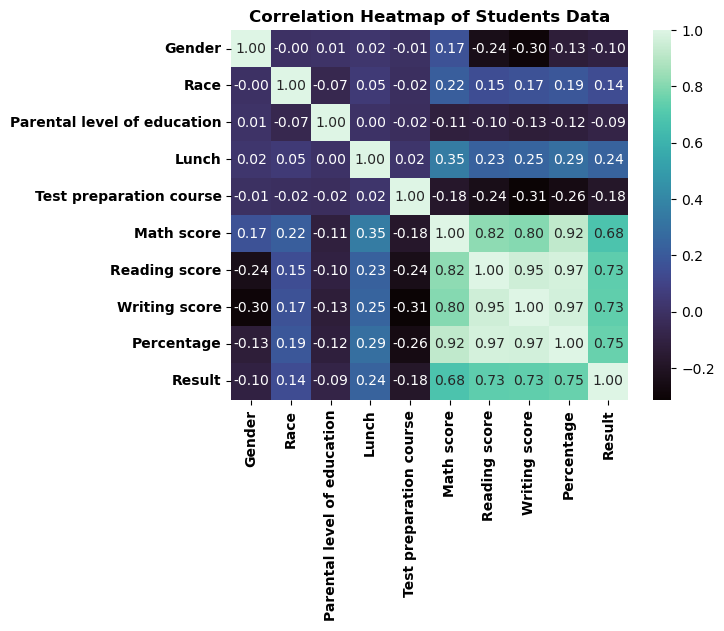

In [60]:
sns.heatmap(data[data.columns].corr(), annot=True, fmt=".2f", cmap='mako', cbar=True)
pyp.title('Correlation Heatmap of Students Data',weight='bold')
pyp.xticks(weight='bold'),pyp.yticks(weight='bold')
pyp.show()

In [61]:
data.columns

Index(['Gender', 'Race', 'Parental level of education', 'Lunch',
       'Test preparation course', 'Math score', 'Reading score',
       'Writing score', 'Percentage', 'Result'],
      dtype='object')

# MODEL TRAINING

In [62]:
xtrain,xtest,ytrain,ytest = train_test_split(data[['Gender', 'Race', 'Parental level of education', 'Lunch',
       'Test preparation course', 'Math score', 'Reading score',
       'Writing score', 'Percentage']],data['Result'],test_size=0.2)

In [63]:
model = LogisticRegression()

In [64]:
model.fit(xtrain,ytrain)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
model.predict(xtest)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1])

# PREDICTION

In [66]:
model.predict(np.array([0,3,1,1,1,90,90,90,90]).reshape(1,-1))

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])